<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# <font color='green'>Model Development</font>


Estimated time needed: **30** minutes
    

## Objectives

After completing this lab you will be able to:

* Develop prediction models


<p>In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>


Some questions we want to ask in this module
<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>
<p>In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>


<h4>Setup</h4>


 Import libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data and store it in dataframe `df`:


In [2]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)

pd.set_option('display.max_columns',999)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.shape

(201, 29)

In [4]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

<h2>1. Linear Regression and Multiple Linear Regression</h2>


<h4>Linear Regression</h4>



<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>



$$
 Y: Response \ Variable\\\\
 X: Predictor \ Variables
$$


 <b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


<h4>Let's load the modules for linear regression:</h4>


In [3]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object:</h4>


In [6]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "highway-mpg" help us predict car price?</h4>


In [8]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


We want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with **highway-mpg** as the predictor variable and the **price** as the response variable.


In [9]:
#We define the predictor variable and response (target) variable
X = df[['highway-mpg']]
Y = df[['price']]

Fit the linear model using highway-mpg:

In [10]:
lm.fit(X,Y)

LinearRegression()

 We can output a prediction:


In [11]:
Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

<h4>What is the value of the intercept (a)?</h4>


In [12]:
lm.intercept_

array([38423.30585816])

<h4>What is the value of the slope (b)?</h4>


In [13]:
lm.coef_

array([[-821.73337832]])

<h3>What is the final estimated linear model we get?</h3>


As we saw above, we should get a final linear model with the structure:


$$
Yhat = a + b  X
$$


Plugging in the actual values we get:


<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 a): </h1>

<b>Create a linear regression object called "lm1".</b>
</div>


In [14]:
lm1 = LinearRegression()
lm1

LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1 b): </h1>

<b>Train the model using "engine-size" as the independent variable and "price" as the dependent variable?</b>
</div>


In [15]:
X = df[['engine-size']]
Y = df[['price']]
lm1.fit(X,Y)

LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 c):</h1>

<b>Find the slope and intercept of the model.</b>
</div>


In [16]:
Yhat = lm1.predict(X)
Yhat[0:5]


array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

<h4>Slope</h4>


In [17]:
lm1.coef_


array([[166.86001569]])

<h4>Intercept</h4>


In [18]:
lm1.intercept_


array([-7963.33890628])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 d): </h1>

<b>What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".</b>
</div>


 <b>yhat</b> = -7963.33 + 166.86*<b>x</b>
 
 or
 
 <b>price</b> = -7963.33 + 166.86 x <b>engine_size</b>

<h4>Multiple Linear Regression</h4>


<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>


$$
Y: Response \ Variable\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
X_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
b_4: coefficients \ of\ Variable \ 4\\\\
$$


The equation is given by:


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [4]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22


Fit the linear model using the four above-mentioned variables.


In [7]:
lm.fit(Z, df['price'])

LinearRegression()

What is the value of the intercept(a)?


In [22]:
lm.intercept_

-15806.624626329223

What are the values of the coefficients (b1, b2, b3, b4)?


In [23]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

 What is the final estimated linear model that we get?


As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

What is the linear function we get in this example?


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2 a): </h1>
<b>Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and  "highway-mpg".</b>
</div>


In [24]:
lm2 = LinearRegression()
X = df[['normalized-losses', 'highway-mpg']]
Y = df[['price']]
lm2.fit(X,Y)

LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 b): </h1>
<b>Find the coefficient of the model.</b>
</div>


In [25]:
lm2.coef_

array([[   1.49789586, -820.45434016]])

In [26]:
lm2.intercept_

array([38201.31327246])

Linear Function

<b>price</b> = 38201.313 + 1.497 x <b> normalised-losses </b> - 820.454 x <b>highway-mpg</b>

<h2>2. Model Evaluation Using Visualization</h2>


Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.


Import the visualization package, seaborn:


In [11]:
# import the visualization package: seaborn
import seaborn as sns

# The %matplotlib inline command tells the IPython environment to draw the plots immediately after the current cell
%matplotlib inline 

<h3>Regression Plot</h3>


<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


 Let's visualize **highway-mpg** as potential predictor variable of **price**:


In [28]:
plt.style.use('ggplot')

(0.0, 48161.5659086678)

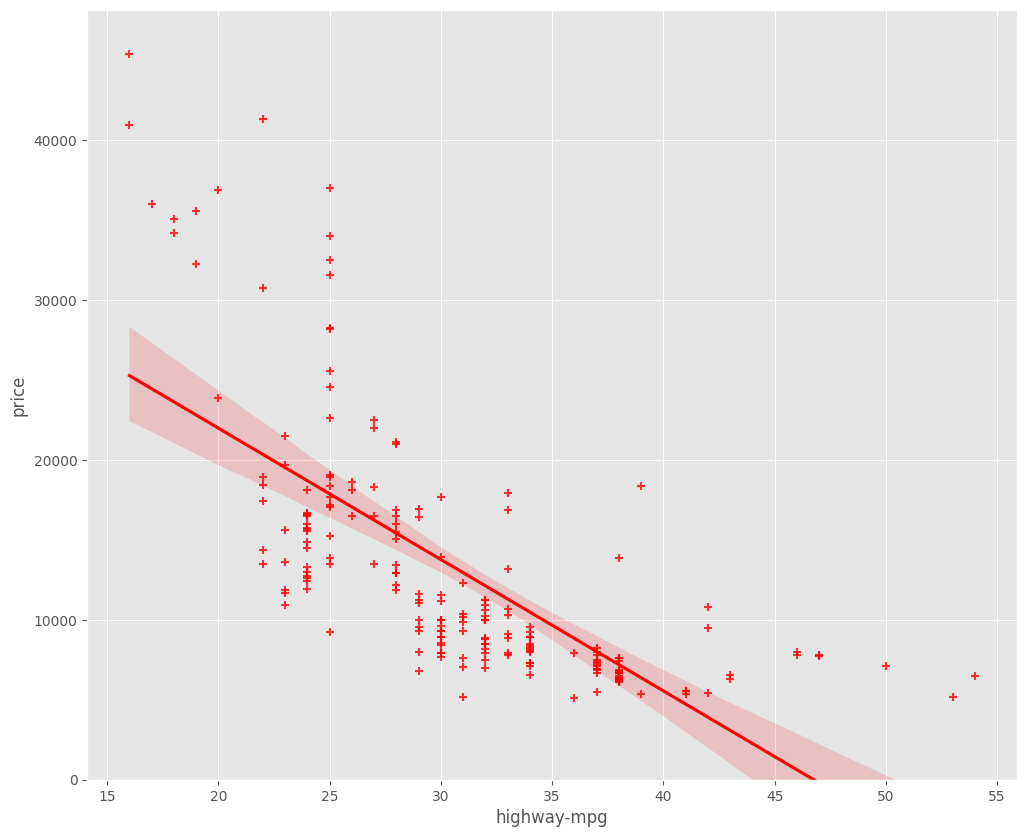

In [29]:
width = 12
height = 10
plt.figure(figsize=(width, height))

sns.regplot(x="highway-mpg", y="price", data=df, marker='+',color='red')

plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. <b>If the data is too far off from the line, this linear model might not be the best model for this data</b>.

Let's compare this plot to the regression plot of "peak-rpm".</p>


(0.0, 47414.1)

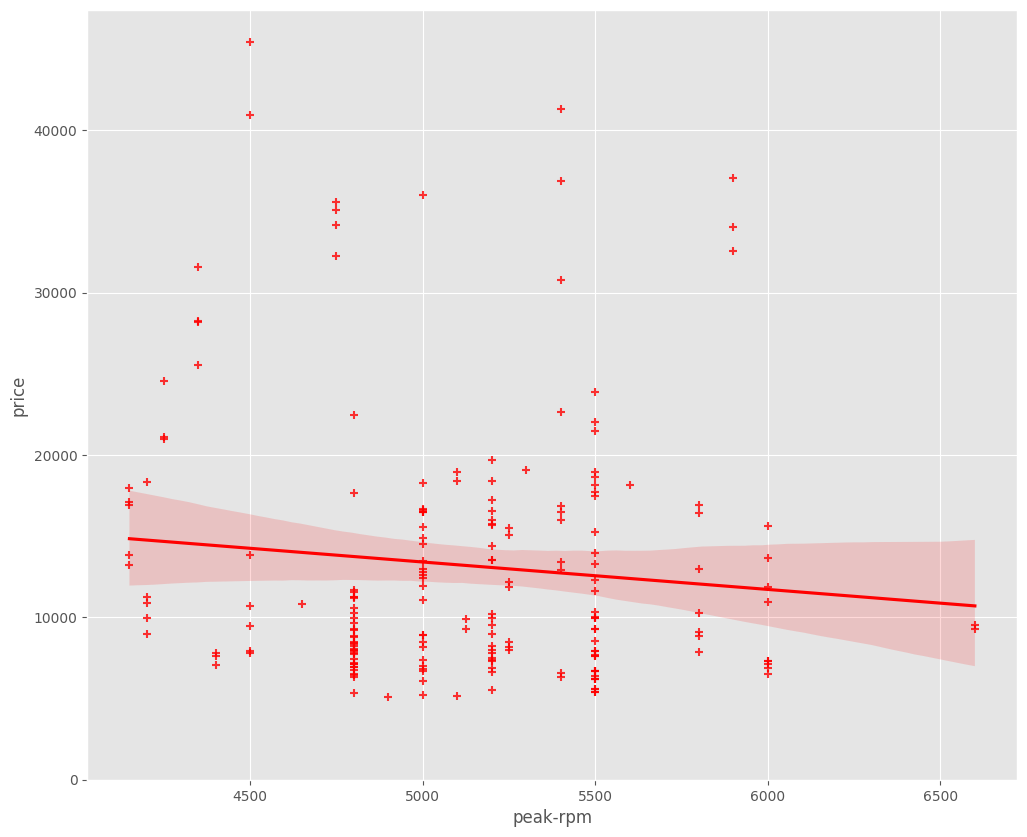

In [30]:
plt.figure(figsize=(width, height))

sns.regplot(x="peak-rpm", y="price", data=df, marker='+',color='red')

plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3:</h1>
<b>Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method  ".corr()" to verify your answer.</b>
</div>


In [31]:
#The corr() method finds the correlation of each column in a DataFrame.
df[["peak-rpm","highway-mpg","price"]].corr()

#A good correlation depends on the use, but it is safe to say you have atleast 0.6 (or -0.6) to call it a good correlation.

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


**The variable "highway-mpg" has a stronger correlation with "price"**, it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. Note that a negative correlation indicates that the two variables are inversely proportional to each other.

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a <b>residual plot</b>.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the <b>residual (e)</b>. When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


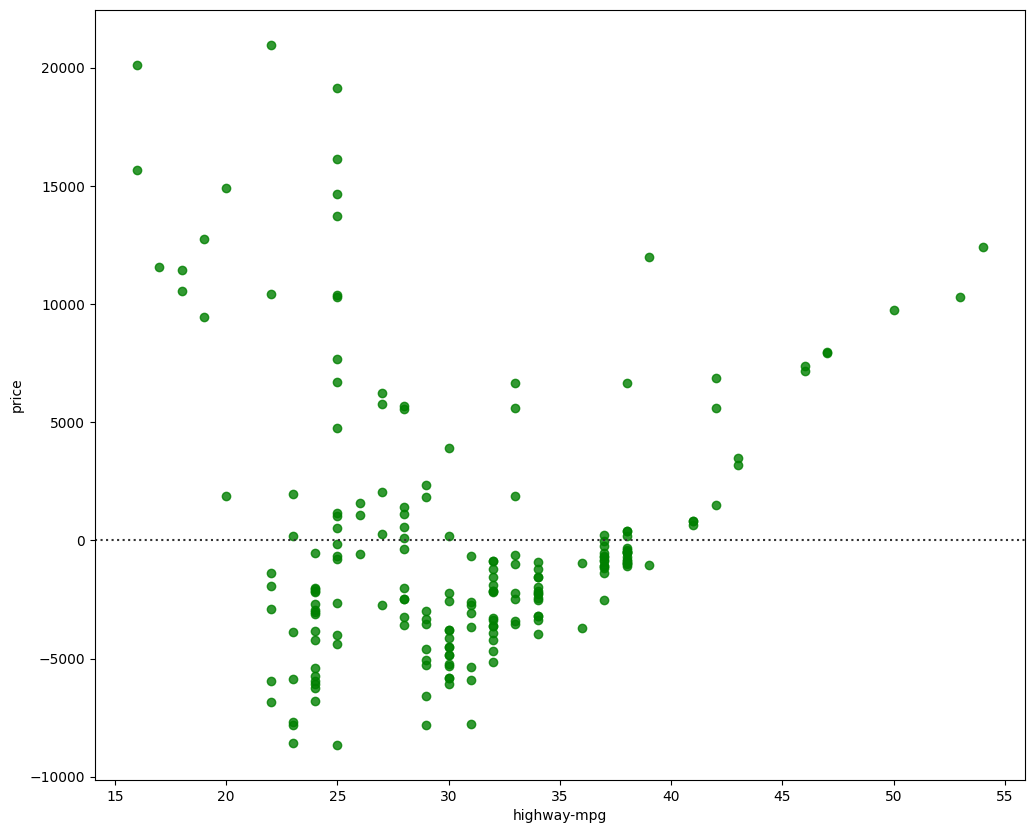

In [12]:
width = 12
height = 10

plt.figure(figsize=(width, height))
sns.residplot(x='highway-mpg', y='price', data=df, color='green')

plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Linear Regression</h3>


<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


First, let's make a prediction:


In [8]:
Y_hat = lm.predict(Z)

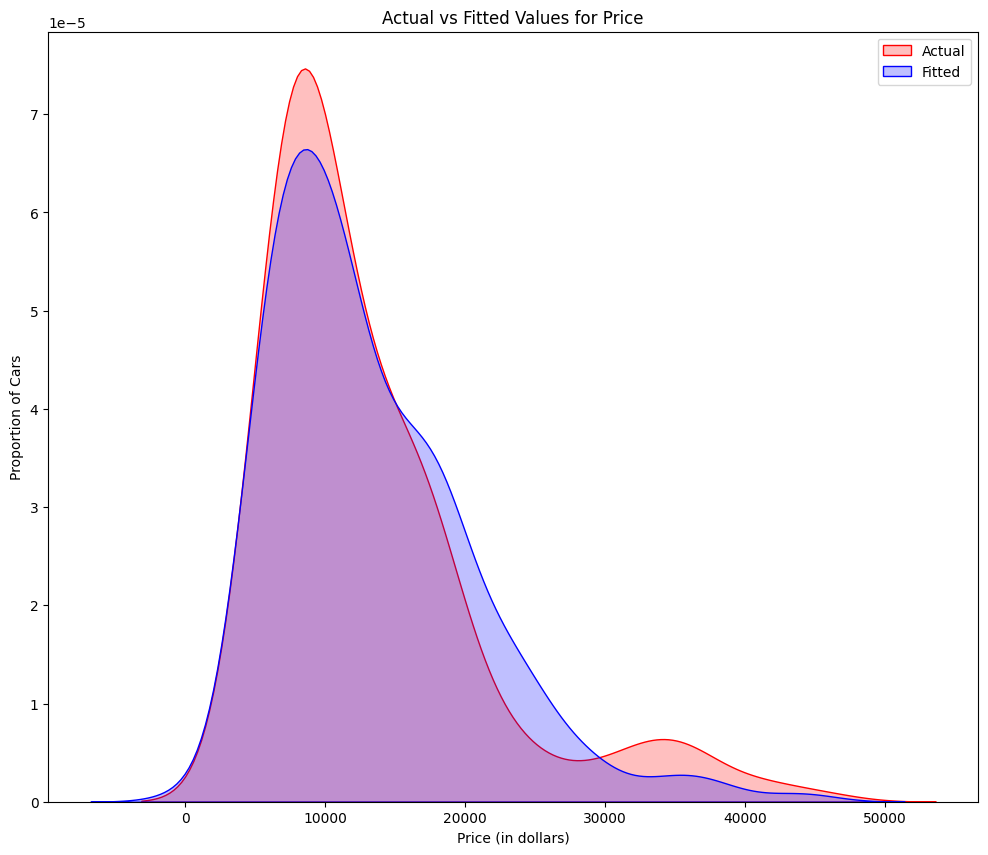

In [13]:
plt.figure(figsize=(width,height))

sns.kdeplot(df['price'], fill = True, color='r', label ='Actual')
sns.kdeplot(Y_hat, fill= True, color ='b',label='Fitted')

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.legend()
plt.show()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<h2>3. Polynomial Regression and Pipelines</h2>


<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$


<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$


<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


Let's get the variables:


In [58]:
x = df['highway-mpg']
y = df['price']

In [59]:
x.min(), x.max()

(16, 54)

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [60]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
my_model = np.poly1d(f)
print(my_model)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


 Let's plot the function:


In [37]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

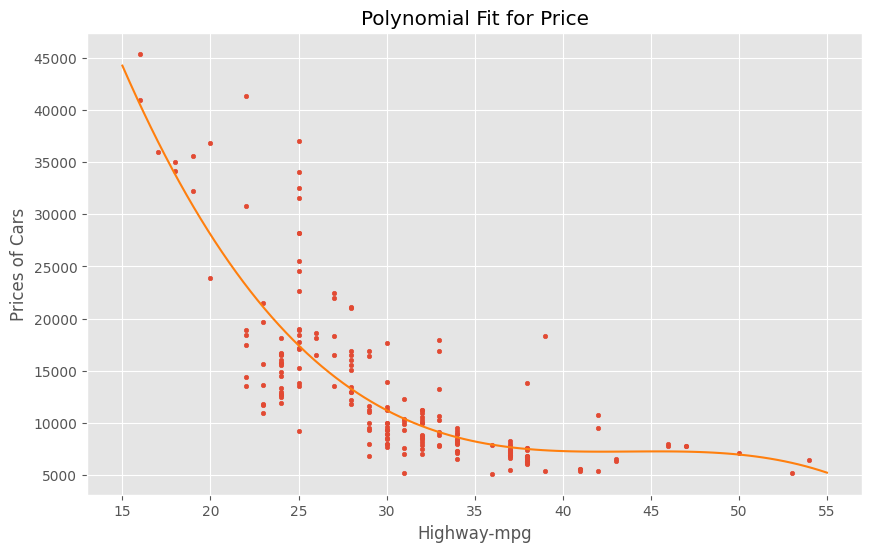

In [38]:
myline = np.linspace(15,55,100)

plt.figure(figsize=(10,6))
plt.scatter(x,y, s=10)
plt.plot(myline, my_model(myline), color='#ff7f0e')

plt.title('Polynomial Fit for Price')
plt.xlabel('Highway-mpg')
plt.ylabel('Prices of Cars')

plt.show()

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4:</h1>
<b>Create 11 order polynomial model with the variables x and y from above.</b>
</div>


In [39]:
f11 = np.polyfit(x,y,11)
my_model11 = np.poly1d(f11)
print(my_model11)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


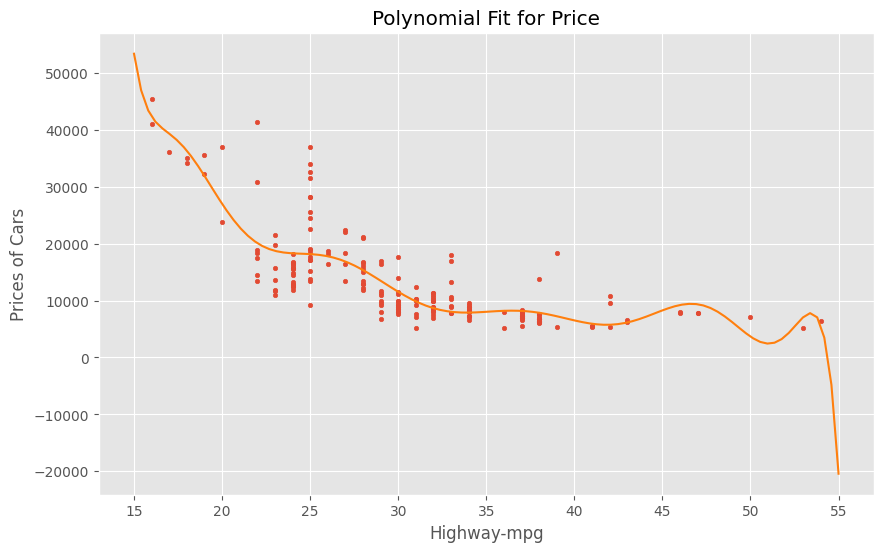

In [35]:
myline = np.linspace(15,55,100)

plt.figure(figsize=(10,6))
plt.scatter(x,y, s=10)
plt.plot(myline, my_model11(myline), color='#ff7f0e')

plt.title('Polynomial Fit for Price')
plt.xlabel('Highway-mpg')
plt.ylabel('Prices of Cars')

plt.show()

<p>The analytical expression for <b>Multivariate Polynomial function</b> gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>


$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

We can perform a polynomial transform on multiple features. First, we import the module:


In [32]:
from sklearn.preprocessing import PolynomialFeatures

We create a <b>PolynomialFeatures</b> object of degree 2: 


In [33]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [34]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22


In [37]:
Z_pr = pr.fit_transform(Z)

In the original data, there are 201 samples and 4 features.


In [38]:
Z.shape

(201, 4)

After the transformation, there are 201 samples and 15 features.


In [39]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>


Imagine you're preparing a delicious meal in your kitchen. You have various ingredients and cooking utensils that need to be processed and combined in a specific order to create the final dish. In this analogy:

- **Data ingestion** is like gathering all the ingredients you need for your meal. You collect data from different sources such as databases, files, or APIs, just as you gather ingredients from your pantry, refrigerator, or local market.

- **Data preprocessing** is similar to the preparation and processing of ingredients. You might need to clean and chop vegetables, marinate meat, or measure quantities accurately. Similarly, in data preprocessing, you clean and transform the data, handle missing values, and ensure it is in the right format for analysis.

- **Modeling and analysis** is akin to cooking and combining ingredients to create the final dish. Here, you apply various techniques like machine learning algorithms or statistical analysis to extract insights, make predictions, or solve specific problems. Just as you use cooking techniques and recipes to combine ingredients and cook them, you apply models and analytical methods to process and analyze the data.

- **Data storage and delivery** is like serving and storing your prepared meal. You may present the dish on a plate, ready to be consumed, and store any leftovers appropriately. Similarly, you store the processed data in a data warehouse, database, or other storage systems for easy access, analysis, and future use. You may also deliver the results of your analysis through reports, dashboards, or other means to provide insights to stakeholders.

A data pipeline, therefore, is like a well-organized, step-by-step recipe for preparing your meal. It ensures that ingredients are collected, prepared, combined, and presented in a systematic and efficient manner. Similarly, a data pipeline collects, processes, analyzes, and stores data in a structured and organized way, enabling you to derive valuable insights and make informed decisions.

Just as a recipe can be tailored and adapted for different dishes, a data pipeline can be customized to suit specific data sources, processing requirements, and analysis goals. The ultimate aim of a data pipeline, like a well-prepared meal, is to create something valuable, informative, and satisfying.

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


Imagine you have a task to build a machine learning model, and you need to perform several data processing steps before training the model. Each step involves a specific transformation or operation on the data. For example, you may need to scale the data, encode categorical variables, and select relevant features.

The scikit-learn Pipeline module helps you organize and execute these data processing steps in a systematic manner. It's like a workflow or assembly line for data transformation and modeling.

Here's a simple explanation of how the Pipeline works:

>**Connecting the steps:** Think of the Pipeline as a series of connected pipes, where each pipe represents a step in the data processing flow. You can connect as many steps as you need, and they will be executed sequentially.

>**Consistent transformation:** Each step in the Pipeline performs a specific transformation or operation on the data. For example, you may have a step to scale the data using a `StandardScaler`, followed by a step to encode categorical variables using a `OneHotEncoder`. The Pipeline ensures that these transformations are applied consistently to the data, in the same order, for both the training and test datasets.

>**End-to-end execution:** When you call the `fit()` method on the Pipeline, it triggers the execution of all the connected steps in order. This means that the data flows through each step, and each step processes or transforms the data as required. It eliminates the need for manual intervention at each step, making the data processing workflow more efficient.

>**Model training and prediction:** The final step in the Pipeline is usually model training. Once the data has been processed by the preceding steps, it's ready to be used for training a machine learning model. The Pipeline takes care of fitting the model to the processed data. Later, when you want to make predictions on new, unseen data, you can simply call the predict() method on the Pipeline, and the data will be transformed and passed through all the steps, including the trained model.

In summary, the scikit-learn Pipeline module is like an assembly line that connects multiple data processing steps. It ensures consistent and efficient execution of these steps, leading to streamlined data transformation and model training. It simplifies the workflow, promotes code reusability, and helps maintain the integrity of the data processing pipelin

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [41]:
# define the pipeline steps
steps =[('scale',StandardScaler()), # Step1: Data scaling using StandardScalar
       ('polynomial', PolynomialFeatures(include_bias=False)), # Step2: Polynomial feature generation
       ('model',LinearRegression()) # Step3: Linear regression model training
       ]

>Step 1: **Data scaling using StandardScaler:** Imagine you have a collection of data with different scales. For example, one feature could range from 0 to 100, while another feature could range from 0 to 100,000. The StandardScaler step makes sure that all the features have similar scales. It does this by subtracting the mean value from each feature and then dividing by the standard deviation. In simpler terms, it rescales the data so that it has a mean of 0 and a standard deviation of 1.

>Step 2: **Polynomial feature generation:** Sometimes, the relationship between features and the target variable isn't linear. The PolynomialFeatures step helps capture such non-linear relationships by generating additional features that are powers or interactions of the original features. For example, if you have a feature called "x," this step can create new features like "x^2" (square of x), "x^3" (cube of x), and "x1 * x2" (interaction between x1 and x2). These new features allow the linear regression model to better capture the complexities in the data.

>Step 3: **Linear regression model training:** Now that the data has been scaled and transformed with polynomial features, it's ready to be used for training a linear regression model. Linear regression is a type of algorithm that tries to find the best-fitting line that represents the relationship between the features and the target variable. By training the linear regression model, we're essentially finding the coefficients for each feature that minimize the differences between the predicted values and the actual values of the target variable.

So, to summarize, the pipeline first ensures that all the features have similar scales, then creates additional features to capture non-linear relationships, and finally trains a linear regression model to find the best-fitting line for predicting the target variable based on the transformed features.

We input the list as an argument to the pipeline constructor:


In [42]:
# create the pipeline
pipe=Pipeline(steps)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously. 


In [43]:
Z = Z.astype(float)

# fit the pipeline to training data
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


In [44]:
# make prediction using pipeline
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Finally, you can evaluate the performance of the model by calculating the score using the score() method, which internally applies the pipeline's transformations and then computes the score, such as the R-squared value for linear regression.

In [45]:
# Evaluate the model performance
pipe.score(Z,y)

0.8463341969864728

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #5:</h1>
<b>Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.</b>
</div>


In [46]:
# Define data
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df[['price']]

# Define the pipeline steps
steps =[('scaler', StandardScaler()),      # Step 1: Standardize the data
        ('model', LinearRegression())      # Step 2: Linear regression model
       ]

# Create the pipeline
pipe = Pipeline(steps)

# Fit the pipeline to the data
pipe.fit(Z, y)

# Make a prediction using the pipeline
ypipe = pipe.predict(Z)
ypipe[0:10]

array([[13699.11161184],
       [13699.11161184],
       [19051.65470233],
       [10620.36193015],
       [15521.31420211],
       [13869.66673213],
       [15456.16196732],
       [15974.00907672],
       [17612.35917161],
       [10722.32509097]])

<h2>4. Measures for In-Sample Evaluation</h2>


<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line or is a measure that tells you how well a regression model fits the data.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>
<p>Imagine you have a scatter plot of data points that represents the relationship between two variables, let's say X and y. You want to draw a line that represents the best fit to the data. The line should pass as close as possible to the data points.

Now, imagine drawing a straight line that is completely horizontal, meaning it doesn't change as X varies. In this case, the line does not capture any information about the relationship between X and y. The R-squared value would be 0%, indicating that none of the variation in y can be explained by X using this line.

On the other hand, if you draw a line that perfectly matches all the data points, the R-squared value would be 100%. This means that 100% of the variation in y can be explained by X using this line.

In summary, R-squared is a measure between 0% and 100%. The closer it is to 100%, the better the model fits the data and can explain the variation in the target variable. If R-squared is low, it indicates that the model doesn't capture much of the variation in the target variable, and there may be other factors or variables influencing the outcome.</p>

The formula for calculating R-squared (coefficient of determination) is as follows:

R-squared = 1 - (SSR / SST)

where:

- **SSR (Sum of Squared Residuals)** represents the sum of the squared differences between the predicted values and the actual values of the target variable.
- **SST (Total Sum of Squares)** represents the sum of the squared differences between the actual values of the target variable and the mean of the target variable.

In more detail:

Calculate the` mean of the target variable`:
**mean_y = (y1 + y2 + ... + yn) / n**

Calculate the `total sum of squares (SST)`:
**SST = (y1 - mean_y)^2 + (y2 - mean_y)^2 + ... + (yn - mean_y)^2**

Fit your regression model and obtain the predicted values, `y_pred`.

Calculate the `sum of squared residuals (SSR)`:
**SSR = (y1 - y_pred1)^2 + (y2 - y_pred2)^2 + ... + (yn - y_predn)^2**

Calculate `R-squared`:
**R-squared = 1 - (SSR / SST)**

R-squared is a value between 0 and 1. A value closer to 1 indicates a better fit of the regression model to the data, as a higher proportion of the variance in the target variable is explained by the model. Conversely, a value closer to 0 indicates that the model does not explain much of the variance in the target variable.

**Mean Squared Error (MSE)**

The `Mean Squared Error` measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

The formula for Mean Squared Error (MSE) is as follows:

**MSE = (1 / n) * Σ(yi - y_pred_i)^2**

where:

- n is the number of samples in the dataset.
- yi represents the actual (true) value of the target variable for the i-th sample.
- y_pred_i represents the predicted value of the target variable for the i-th sample.

In more detail:

- Calculate the squared differences between the actual and predicted values for each sample.
**(yi - y_pred_i)^2**

- Sum up all the squared differences.
**Σ(yi - y_pred_i)^2**

- Divide the sum by the number of samples.
**MSE = (1 / n) * Σ(yi - y_pred_i)^2**

MSE is a commonly used metric to evaluate the performance of regression models. It represents the average squared difference between the predicted and actual values of the target variable. The lower the MSE, the better the model's predictions align with the true values.

You can calculate the MSE in your Jupyter Notebook by implementing the formula using numpy or any other mathematical library, or you can use scikit-learn's `mean_squared_error` function to calculate it directly.

<h3>Model 1: Simple Linear Regression</h3>


Let's calculate the R^2:


In [47]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4966263556974878


We can say that ~49.662% of the variation of the price is explained by this simple linear model "horsepower_fit".


Let's calculate the MSE:


We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [48]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[16231.78938339]
 [16231.78938339]
 [17052.24372355]
 [13833.33798916]]


Let's import the function <b>mean_squared_error</b> from the module <b>metrics</b>:


In [49]:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:


In [50]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31632832.975589428


<h3>Model 2: Multiple Linear Regression</h3>


Let's calculate the R^2:


In [51]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.935 % of the variation of price is explained by this multiple linear regression "multi_fit".


Let's calculate the MSE.


We produce a prediction:


In [52]:
Y_predict_multifit = lm.predict(Z)

We compare the predicted results with the actual results:


In [53]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>


Let's calculate the R^2.


Let’s import the function <b>r2_score</b> from the module <b>metrics</b> as we are using a different function.


In [54]:
from sklearn.metrics import r2_score

We apply the function to get the value of R^2:


In [75]:
r_squared = r2_score(y, my_model(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906516


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.


<h3>MSE</h3>


We can also calculate the MSE:  


In [76]:
mean_squared_error(df['price'], my_model(x))

20474146.42636123

<h2>5. Prediction and Decision Making</h2>


<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

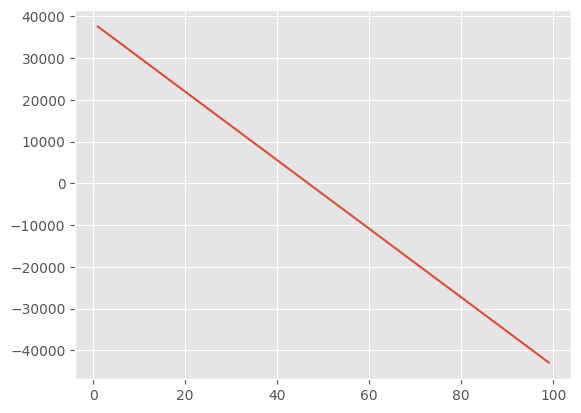

In [83]:
# create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

#fit the model 
lm.fit(df[['highway-mpg']], Y)

# produce a prediction
yhat = lm.predict(new_input)

# plot
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>


<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h2>Conclusion</h2>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
